# Chapter 04. 다양한 분류 알고리즘
# Ch04-1. 로지스틱 회귀

## 럭키백의 확률

### 데이터 준비하기

In [44]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [45]:
# 생선의 종류
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [46]:
# Species 열을 제외하고 나머지 열은 입력 데이터로 사용
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]

In [47]:
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [48]:
fish_target = fish['Species']

In [49]:
type(fish['Species'])

pandas.core.series.Series

In [50]:
type(fish[['Species']])

pandas.core.frame.DataFrame

In [51]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [52]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [53]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)    # n_neighbors : 최근접 이웃 개수 설정
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [54]:
print(pd.unique(fish['Species']))
print(kn.classes_)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


사이킷런 모델에서 순서가 자동으로 알파벳 순으로 매겨짐.

In [55]:
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [56]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [57]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])   # predict_proba() : 클래스별 확률값 반환
print(np.round(proba, decimals=4))      # decimals : 유지할 소수점 아래 자릿수 지정. 다섯번 째 자리에서 반올림.

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [58]:
test_scaled[3:4]

array([[-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464]])

In [59]:
test_scaled[3]

array([-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464])

In [60]:
kn.kneighbors(test_scaled[3:4])

(array([[0.20774583, 0.24862983, 0.33682411]]), array([[104, 115, 106]]))

In [61]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(indexes[0])
print(train_target.iloc[indexes[0]])

[104 115 106]
52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


## 로지스틱 회귀

**로지스틱 회귀** : 이름은 회귀이지만, 분류 모델임.

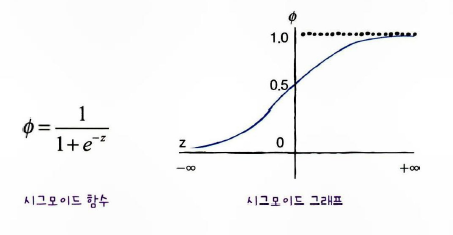

z가,
- 음수 → 0에 수렴
- 양수 → 1에 수렴
- 0 → 0.5

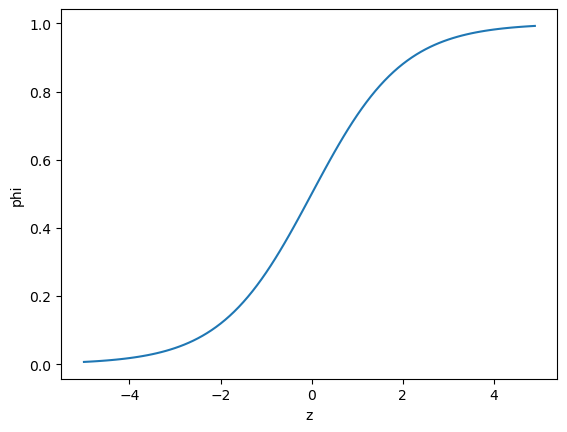

In [62]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))  # np.exp() : 지수함수 계산
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [63]:
# 불리언 인덱싱으로 행을 선택 가능
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [64]:
# 비교 연산자를 사용해서 True로 만들어서 뽑기
# train_target에서 'Bream'이거나 'Smelt'인 것만 True로 나타남.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print(bream_smelt_indexes)

26      True
137    False
146     True
90     False
66     False
       ...  
71     False
106    False
14      True
92     False
102    False
Name: Species, Length: 119, dtype: bool


In [65]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
print(train_bream_smelt)

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [66]:
target_bream_smelt = train_target[bream_smelt_indexes]
print(target_bream_smelt)

26     Bream
146    Smelt
22     Bream
11     Bream
27     Bream
150    Smelt
4      Bream
32     Bream
10     Bream
0      Bream
28     Bream
25     Bream
23     Bream
154    Smelt
33     Bream
148    Smelt
157    Smelt
5      Bream
34     Bream
7      Bream
8      Bream
13     Bream
3      Bream
17     Bream
6      Bream
156    Smelt
21     Bream
153    Smelt
149    Smelt
1      Bream
158    Smelt
20     Bream
14     Bream
Name: Species, dtype: object


In [67]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [68]:
# 처음 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [69]:
# 처음 5개 샘플 예측 확률
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


샘플마다 2개의 확률 출력됨.

[음성 클래스(0)     양성 클래스(1)]



In [70]:
print(lr.classes_)

['Bream' 'Smelt']


사이킷런은 타깃값을 알파벳순으로 정렬해서 사용함

`classes_` 속성을 통해 클래스를 확인할 수 있음.

- 음성 클래스(0) → Bream

- 양성 클래스(1) → Smelt

In [71]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


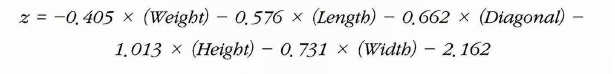

In [72]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [73]:
# expit() : 시그모이드 함수
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


`decision_function()` : 모델이 학습한 선형 방정식의 출력을 반환. 양성 클래스에 대한 z값 반환

`predict_proba()` 메서드 출력의 두 번째 열의 값과 동일함.

### 로지스틱 회귀로 다중 분류 수행하기

In [74]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


매개변수 `C` : LogisticRegression에서 규제를 제어하는 매개변수. 작을수록 규제가 커짐. (default=1)

In [75]:
# 처음 5개 샘플 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [76]:
# 처음 5개 샘플 예측 확률
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))  # 소수점 네번째 자리에서 반올림

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


클래스 개수만큼 확률을 출력함.

In [77]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [78]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


**시그모이드 함수** : 하나의 선형 방정식의 출력값을 0~1 사이로 압축함.

**소프트맥스 함수** : 여러 개의 선형 방정식의 출력값을 0~1 사이의 확률로 압축함.

In [79]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [80]:
from scipy.special import softmax
proba = softmax(decision, axis=1)   # axis=1 : 각 행(샘플)에 대해 소프트맥스 계산
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


proba 배열과 결과가 일치함.